# Week 6

Import necessary libraries and parameters:

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

Load the dataset:

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

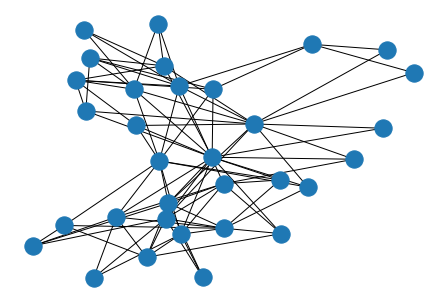

In [3]:
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

nx.draw(G)
plt.show()

## The women

Because this is a bipartite network, we can break it down into the two types of elements that compose it: women and clubs.

We can create the affiliation network of the women:

In [4]:
women_net = bipartite.weighted_projected_graph(G, women, ratio=False)

We use the affiliation network of the women to construct the graph below, which uses edge color and thickness to indicate strength of the relationship between the two women. (Brighter color indicates stronger relationship, while darker implies weaker.)

The strongest relationship is the only yellow edge below, between Evelyn Jefferson and Theresa Anderson, with a weight of 7:

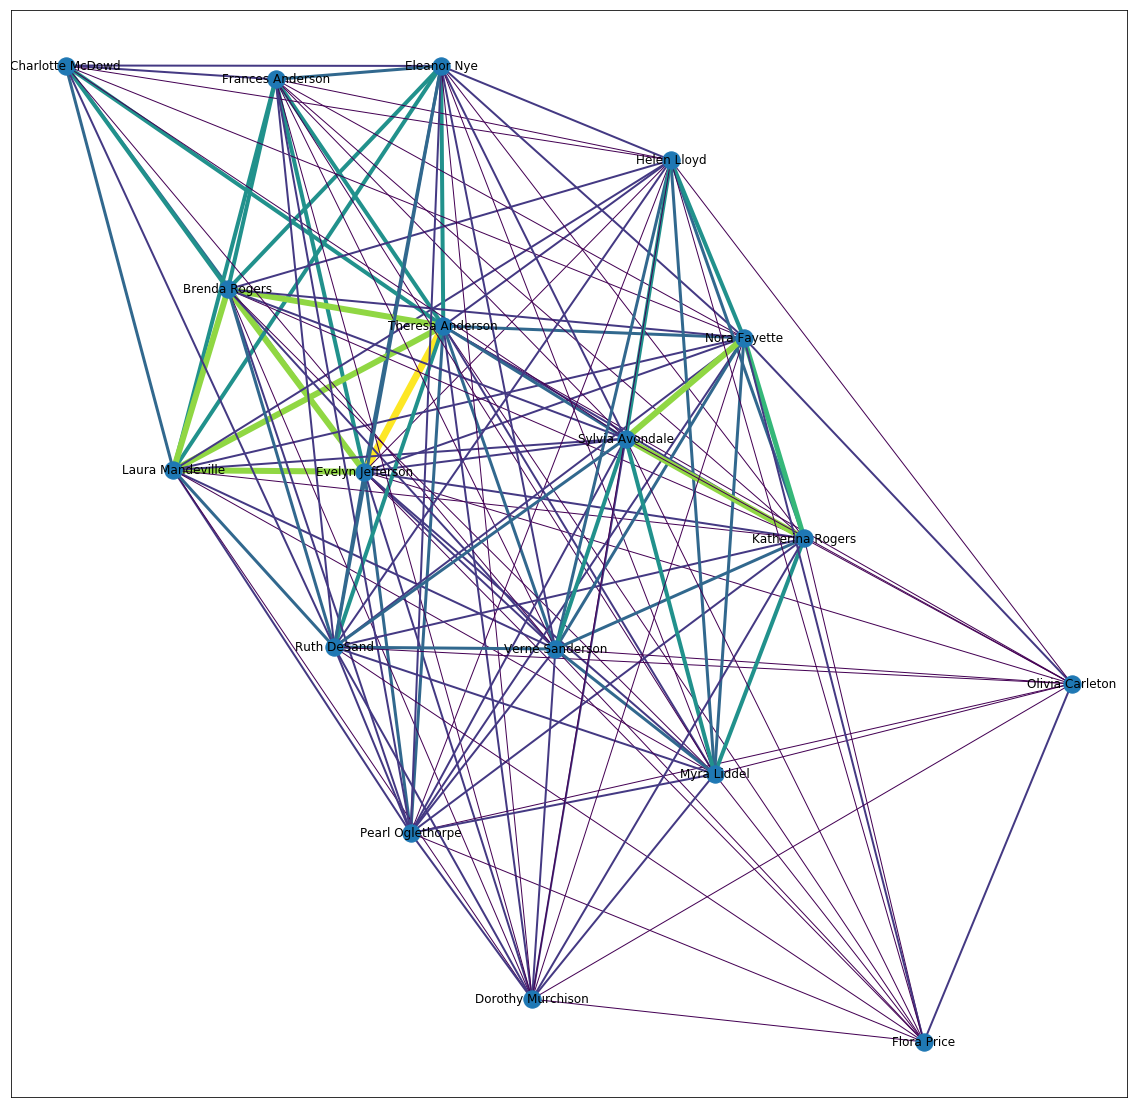

In [36]:
weights = [i[2]['weight'] for i in women_net.edges(data=True)]

plt.figure(figsize=(20, 20)) 
nx.draw_networkx(women_net, width=weights, edge_color=weights)
plt.show()

## Clubs network

We can perform the same with the events. The plot below all the clubs seems to indicate they are all at least minimally interrelated to eachother, but that E8 and E9 have the strongest relationship.

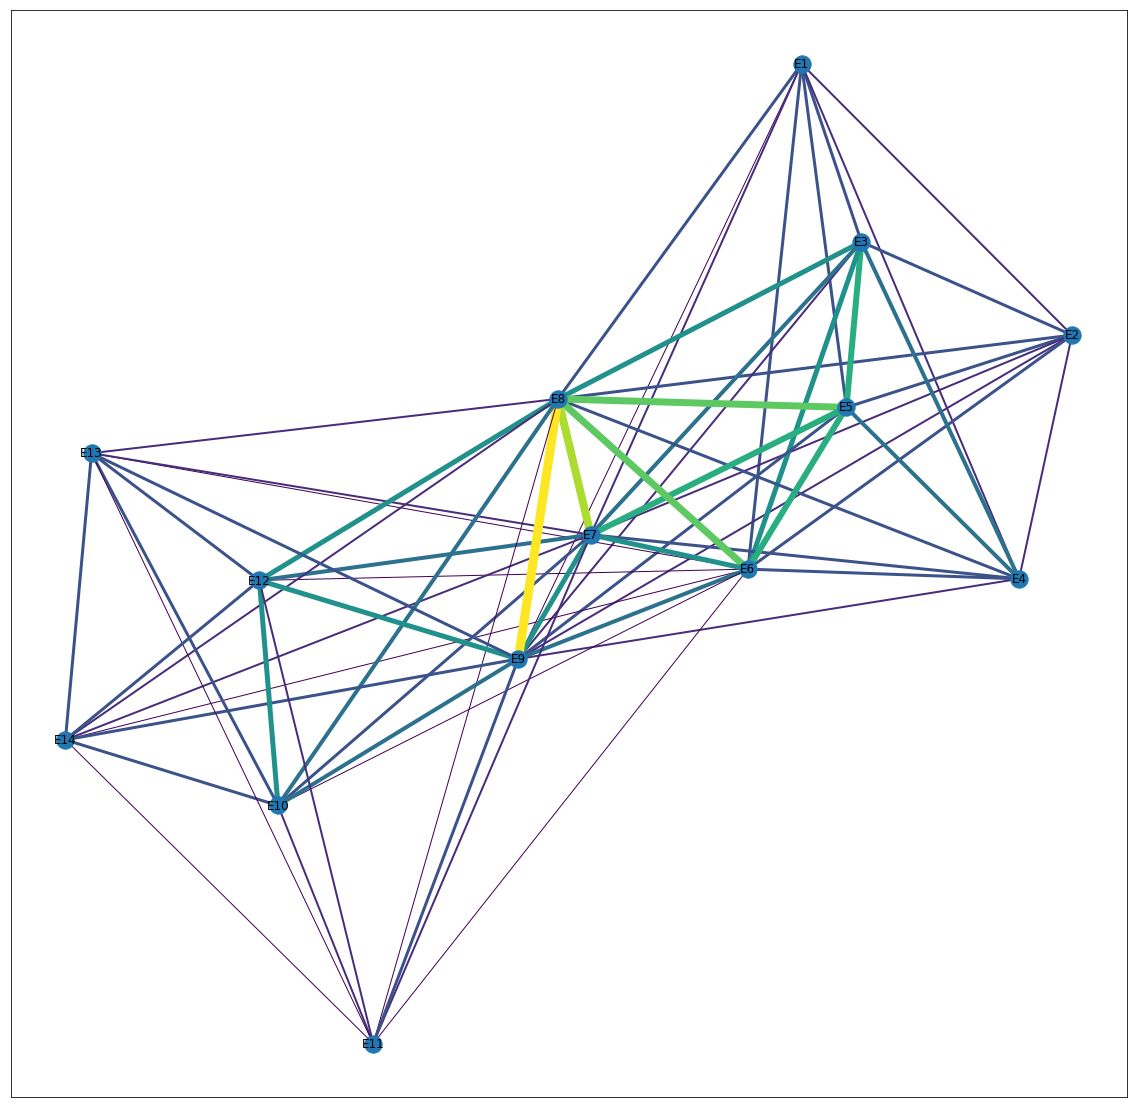

In [5]:
clubs_net = bipartite.weighted_projected_graph(G, clubs, ratio=False)

weights = [i[2]['weight'] for i in clubs_net.edges(data=True)]

plt.figure(figsize=(20, 20)) 
nx.draw_networkx(clubs_net, width=weights, edge_color=weights)
plt.show()